### Задание 1. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error as mse

sin, cos = np.sin, np.cos

In [2]:
def main_func(x):
    return x ** 2 * (sin(0.5 * x) ** 2 + 1)


def der_func(x):
    return 2 * x * (sin(0.5 * x) ** 2 + 1) + x ** 2 * sin(0.5 * x) * cos(0.5 * x)


def calculate_grad(func, x0, delta=0.01):
    return (func(x0 + delta) - func(x0)) / delta


def calculate_grad_2(func, x0, delta=0.01):
    return (func(x0 + delta) - func(x0 - delta)) / (2 * delta)

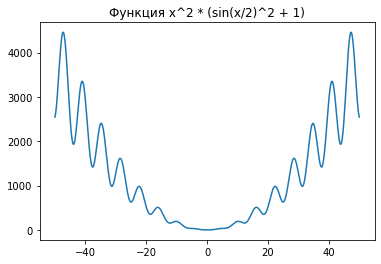

In [3]:
x = np.linspace (-50, 50, 1000)
plt.plot(x, main_func(x))
plt.title('Функция x^2 * (sin(x/2)^2 + 1)')
plt.show()

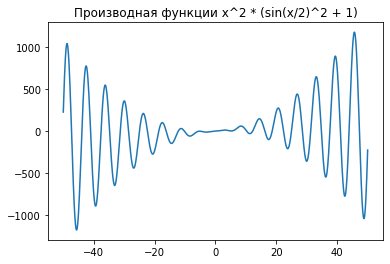

In [4]:
plt.plot(x, der_func(x))
plt.title('Производная функции x^2 * (sin(x/2)^2 + 1)')
plt.show()

In [5]:
X = np.random.rand(2, 10)
X

array([[0.66299772, 0.34562998, 0.22874369, 0.3688897 , 0.85154461,
        0.49884159, 0.40721817, 0.29308752, 0.21906059, 0.35187298],
       [0.96420407, 0.27117343, 0.8795761 , 0.07511894, 0.43439976,
        0.43860873, 0.31977202, 0.95600362, 0.44419455, 0.43809467]])

In [6]:
Y = np.array([main_func(el) for el in X])
Y

array([[0.48612684, 0.12299238, 0.05300514, 0.14065676, 0.84882715,
        0.26400526, 0.17260678, 0.08773184, 0.04856095, 0.12760773],
       [1.12953972, 0.07487862, 0.91388751, 0.00565081, 0.19746625,
        0.20148253, 0.10484592, 1.10733818, 0.20688251, 0.20098958]])

**Определение шага**

In [7]:
x0 = random.choice(X[1])

In [8]:
# метод 1
der_func(x0)

0.9488546995948667

In [9]:
# метод 2
calculate_grad(main_func, x0)

0.9616155449860359

In [10]:
# метод 3
calculate_grad_2(main_func, x0)

0.9488947832563029

**Параметры шага и количества итераций**

In [13]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter
        
    def fit(self, func, grad, a):
        for i in range(self.n_iter):
            a -= self.alpha * grad(a)
        return a

alpha = 0.12
opt = optimizer(alpha, 75)
e = opt.fit(main_func, der_func, np.random.uniform(-50, 50))

print(e, main_func(e))

-4.411701914452471e-09 1.9463113781983598e-17


In [14]:
def mserror(X, w, y_real):
    y = X.dot(w.T)
    return np.sum((y - y_real) ** 2) / y_real.shape[0]


def mserror_grad(X, w, y_real):
    return 2 * (X.dot(w.T) - y_real).T.dot(X) / y_real.shape[0]

In [16]:
w = np.zeros(shape=(1, 10))

# список векторов весов после каждой итерации
w_list = [w.copy().flatten()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.95

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * mserror_grad(X, w, Y)
    weight_dist = np.linalg.norm(new_w - w)
    w_list.append(new_w.copy().flatten())
    
    cur_error = mserror(X, new_w, Y)
    if cur_error == float('inf'):
        print(f'iter num: {iter_num}')
        break
    
    if iter_num % 10 == 0:
        print(f'iteration {iter_num}. current error: {cur_error}')
    
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

iteration 0. current error: 27.951081460048297
iteration 10. current error: 20651853516431.52
iteration 20. current error: 1.5326933612632303e+25
iteration 30. current error: 1.1375002915797816e+37
iteration 40. current error: 8.44204683106126e+48
iteration 50. current error: 6.265330675111556e+60
iteration 60. current error: 4.64986386051108e+72
iteration 70. current error: 3.4509326071447973e+84
iteration 80. current error: 2.5611364582502517e+96
iteration 90. current error: 1.900767330024947e+108
iteration 100. current error: 1.4106692485095002e+120
iteration 110. current error: 1.0469391478147097e+132
iteration 120. current error: 7.7699402633544256e+143
iteration 130. current error: 5.766521561650598e+155
iteration 140. current error: 4.2796687997476854e+167
iteration 150. current error: 3.176189465298935e+179
iteration 160. current error: 2.3572336999701243e+191
iteration 170. current error: 1.7494393130454757e+203
iteration 180. current error: 1.2983599844460961e+215
iteration 1

<ipython-input-14-2e3812e8fcd0>:3: RuntimeWarning: overflow encountered in square
  return np.sum((y - y_real) ** 2) / y_real.shape[0]
<ipython-input-16-37b6307ffc82>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w_list = np.array(w_list)
